In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
arr = os.listdir('results')
arr

['account_date_trade_a2c_0.csv',
 'account_date_trade_a2c_10020.csv',
 'account_date_trade_a2c_10050.csv',
 'account_date_trade_a2c_10080.csv',
 'account_date_trade_a2c_10110.csv',
 'account_date_trade_a2c_10140.csv',
 'account_date_trade_a2c_10170.csv',
 'account_date_trade_a2c_1020.csv',
 'account_date_trade_a2c_10200.csv',
 'account_date_trade_a2c_10230.csv',
 'account_date_trade_a2c_10260.csv',
 'account_date_trade_a2c_10290.csv',
 'account_date_trade_a2c_10320.csv',
 'account_date_trade_a2c_10350.csv',
 'account_date_trade_a2c_10380.csv',
 'account_date_trade_a2c_10410.csv',
 'account_date_trade_a2c_10440.csv',
 'account_date_trade_a2c_10470.csv',
 'account_date_trade_a2c_1050.csv',
 'account_date_trade_a2c_10500.csv',
 'account_date_trade_a2c_10530.csv',
 'account_date_trade_a2c_10560.csv',
 'account_date_trade_a2c_10590.csv',
 'account_date_trade_a2c_10620.csv',
 'account_date_trade_a2c_10650.csv',
 'account_date_trade_a2c_10680.csv',
 'account_date_trade_a2c_10710.csv',
 'accou

In [9]:
account_value_trade = [c for c in arr if 'account_value_trade' in c]
account_date_trade = [c for c in arr if 'account_date_trade' in c]

In [10]:
models = [
    'a2c',
    'ddpg',
    'ppo',
    'ensemble'
]

In [11]:
index_list = list(set([c.split('_')[-1].split('.')[0] for c in account_value_trade]))
index_list = sorted(index_list, key=lambda d: int(d)) 
index_list

['0',
 '30',
 '60',
 '90',
 '120',
 '150',
 '180',
 '210',
 '240',
 '270',
 '300',
 '330',
 '360',
 '390',
 '420',
 '450',
 '480',
 '510',
 '540',
 '570',
 '600',
 '630',
 '660',
 '690',
 '720',
 '750',
 '780',
 '810',
 '840',
 '870',
 '900',
 '930',
 '960',
 '990',
 '1020',
 '1050',
 '1080',
 '1110',
 '1140',
 '1170',
 '1200',
 '1230',
 '1260',
 '1290',
 '1320',
 '1350',
 '1380',
 '1410',
 '1440',
 '1470',
 '1500',
 '1530',
 '1560',
 '1590',
 '1620',
 '1650',
 '1680',
 '1710',
 '1740',
 '1770',
 '1800',
 '1830',
 '1860',
 '1890',
 '1920',
 '1950',
 '1980',
 '2010',
 '2040',
 '2070',
 '2100',
 '2130',
 '2160',
 '2190',
 '2220',
 '2250',
 '2280',
 '2310',
 '2340',
 '2370',
 '2400',
 '2430',
 '2460',
 '2490',
 '2520',
 '2550',
 '2580',
 '2610',
 '2640',
 '2670',
 '2700',
 '2730',
 '2760',
 '2790',
 '2820',
 '2850',
 '2880',
 '2910',
 '2940',
 '2970',
 '3000',
 '3030',
 '3060',
 '3090',
 '3120',
 '3150',
 '3180',
 '3210',
 '3240',
 '3270',
 '3300',
 '3330',
 '3360',
 '3390',
 '3420',
 '34

In [12]:
account_value_trade

['account_value_trade_a2c_0.csv',
 'account_value_trade_a2c_10020.csv',
 'account_value_trade_a2c_10050.csv',
 'account_value_trade_a2c_10080.csv',
 'account_value_trade_a2c_10110.csv',
 'account_value_trade_a2c_10140.csv',
 'account_value_trade_a2c_10170.csv',
 'account_value_trade_a2c_1020.csv',
 'account_value_trade_a2c_10200.csv',
 'account_value_trade_a2c_10230.csv',
 'account_value_trade_a2c_10260.csv',
 'account_value_trade_a2c_10290.csv',
 'account_value_trade_a2c_10320.csv',
 'account_value_trade_a2c_10350.csv',
 'account_value_trade_a2c_10380.csv',
 'account_value_trade_a2c_10410.csv',
 'account_value_trade_a2c_10440.csv',
 'account_value_trade_a2c_10470.csv',
 'account_value_trade_a2c_1050.csv',
 'account_value_trade_a2c_10500.csv',
 'account_value_trade_a2c_10530.csv',
 'account_value_trade_a2c_10560.csv',
 'account_value_trade_a2c_10590.csv',
 'account_value_trade_a2c_10620.csv',
 'account_value_trade_a2c_10650.csv',
 'account_value_trade_a2c_10680.csv',
 'account_value_tr

In [13]:
def joinDatesAndValues(account_date_trade, account_value_trade, column_name):
    account_date_trade = pd.read_csv(account_date_trade)
    account_value_trade = pd.read_csv(account_value_trade)
    df=pd.concat([account_date_trade['0'],account_value_trade['0']],axis=1)
    df.columns = ['date',column_name]
    return df

In [14]:
def mergeDataframes(df_list, column):
    df = pd.concat(df_list, axis=0)
    df = df.dropna(subset=[column])
    df = df.sort_values(by=[column])
    return df

In [15]:
def joinDataframes(index):
    df_list = []
    for m in models:
        account_date_trade = 'results/account_date_trade_{}_{}.csv'.format(m, index)
        account_value_trade = 'results/account_value_trade_{}_{}.csv'.format(m, index)
        df = joinDatesAndValues(account_date_trade, account_value_trade, m)
        df_list.append(df)
    return mergeDataframes(df_list, 'date')
    

In [16]:
data = []
for i in index_list:
    df = joinDataframes(i)
    lf = list(df.index.unique().values)

    for l in lf:
        dfTemp = df.loc[l,:]
        d = {}
        d['date'] = dfTemp.date.values[0]
        for c in dfTemp.columns:
            d[c] = dfTemp[c].max()
        data.append(d)

In [19]:
data

[{'date': '2022-02-14 15:32:00',
  'a2c': 1000000.0,
  'ddpg': 1000000.0,
  'ppo': 1000000.0,
  'ensemble': 1000000.0},
 {'date': '2022-02-14 15:33:00',
  'a2c': 999922.4632437528,
  'ddpg': 999791.7620000002,
  'ppo': 1000299.0532,
  'ensemble': 999791.7620000002},
 {'date': '2022-02-14 15:34:00',
  'a2c': 1000193.8237436984,
  'ddpg': 1000609.9877600004,
  'ppo': 1000035.670260852,
  'ensemble': 1000609.9877600004},
 {'date': '2022-02-14 15:35:00',
  'a2c': 1000561.9402247432,
  'ddpg': 1001019.8077600002,
  'ppo': 1000531.608918184,
  'ensemble': 1001019.8077600002},
 {'date': '2022-02-14 15:36:00',
  'a2c': 999584.5717007028,
  'ddpg': 1000571.1877600002,
  'ppo': 998766.70039375,
  'ensemble': 1000571.1877600002},
 {'date': '2022-02-14 15:37:00',
  'a2c': 999105.3178112372,
  'ddpg': 1000183.9477600002,
  'ppo': 998178.5666091652,
  'ensemble': 1000183.9477600002},
 {'date': '2022-02-14 15:38:00',
  'a2c': 998756.8915838205,
  'ddpg': 999814.8477600004,
  'ppo': 998355.0748617752,

In [20]:
df = pd.DataFrame(data)

In [21]:
df['date'] = pd.to_datetime(df["date"])
df

,date,a2c,ddpg,ppo,ensemble
0,2022-02-14 15:32:00,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
1,2022-02-14 15:33:00,9.999225e+05,9.997918e+05,1.000299e+06,9.997918e+05
2,2022-02-14 15:34:00,1.000194e+06,1.000610e+06,1.000036e+06,1.000610e+06
3,2022-02-14 15:35:00,1.000562e+06,1.001020e+06,1.000532e+06,1.001020e+06
4,2022-02-14 15:36:00,9.995846e+05,1.000571e+06,9.987667e+05,1.000571e+06
...,...,...,...,...,...
12891,2022-03-30 15:27:00,7.074902e+05,7.299219e+05,9.298576e+02,8.495172e+05
12892,2022-03-30 15:28:00,7.077781e+05,7.301186e+05,9.301176e+02,8.496471e+05
12893,2022-03-30 15:29:00,7.078407e+05,7.300449e+05,9.305027e+02,8.494970e+05
12894,2022-03-30 15:30:00,7.080109e+05,7.301919e+05,9.271210e+02,8.495927e+05


In [22]:
df.index = df['date'] 

<Axes: xlabel='date'>

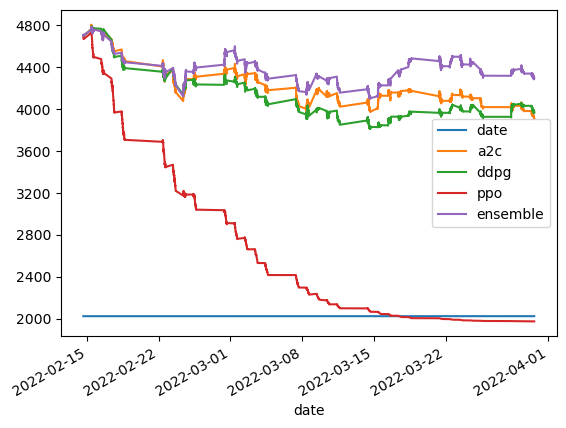

In [23]:
df.plot()
#plt.grid(True)
#plt.show()

<Axes: xlabel='date'>

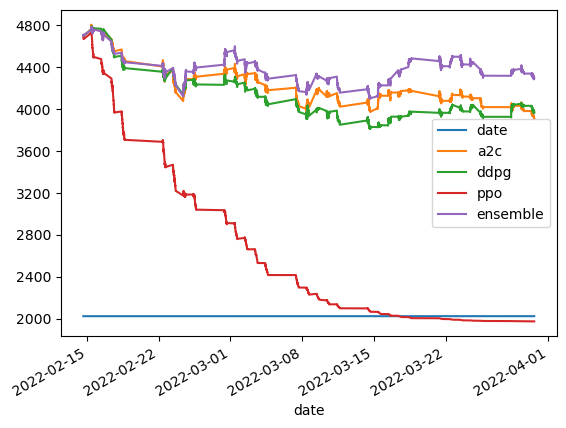

In [24]:
df.plot()

In [25]:
df_data = pd.read_csv('C:/Users/oscar/Desktop/TesisPaula/DataToTrain/dfFinal2.csv')
df_data = df_data[df_data['tic'] == 'nasdaq']
df_data = df_data[['datadate', 'close']]
df_data['datadate'] = pd.to_datetime(df_data["datadate"])
df_data = df_data.rename(columns={'close': 'nasdaq'})
df_data

,datadate,nasdaq
8,2021-10-01 09:00:00,14566.54
19,2021-10-01 09:02:00,14566.54
30,2021-10-01 09:03:00,14566.54
41,2021-10-01 09:05:00,14566.54
52,2021-10-01 09:07:00,14566.54
...,...,...
546466,2022-03-30 15:57:00,15071.55
546477,2022-03-30 15:58:00,15071.55
546488,2022-03-30 15:59:00,15071.55
546499,2022-03-30 16:00:00,15071.55


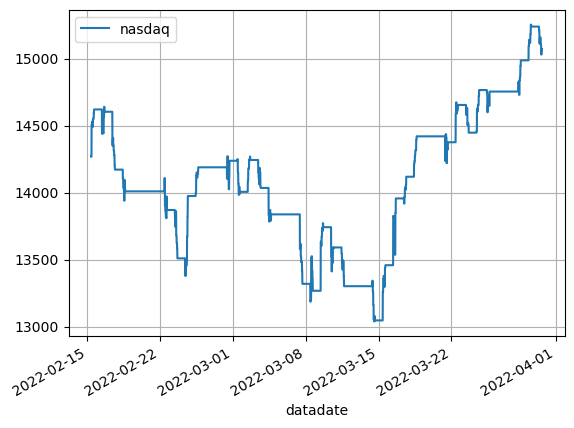

In [26]:
df_data_temp = df_data.copy()
df_data_temp.index = df_data_temp['datadate']
del df_data_temp['datadate']
df_data_temp = df_data_temp[df_data_temp.index > '2022-02-15']
df_data_temp.plot()
plt.grid()
plt.show()

In [27]:
column = 'nasdaq'
df_data_temp['log_return'] = np.log(df_data_temp[column]) - np.log(df_data_temp[column].shift(1))
df_data_temp['cum_log_return'] = np.cumsum(df_data_temp['log_return'])
df_data_temp = df_data_temp.bfill()
df_data_temp

,nasdaq,log_return,cum_log_return
datadate,,,
2022-02-15 09:31:00,14268.59,0.0,0.000000
2022-02-15 09:32:00,14268.59,0.0,0.000000
2022-02-15 09:33:00,14268.59,0.0,0.000000
2022-02-15 09:34:00,14268.59,0.0,0.000000
2022-02-15 09:35:00,14268.59,0.0,0.000000
...,...,...,...
2022-03-30 15:57:00,15071.55,0.0,0.054748
2022-03-30 15:58:00,15071.55,0.0,0.054748
2022-03-30 15:59:00,15071.55,0.0,0.054748


<Axes: xlabel='datadate'>

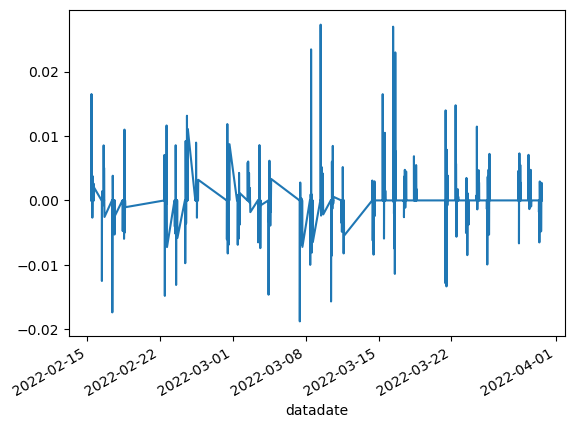

In [28]:
df_data_temp['log_return'].plot()

<Axes: xlabel='datadate'>

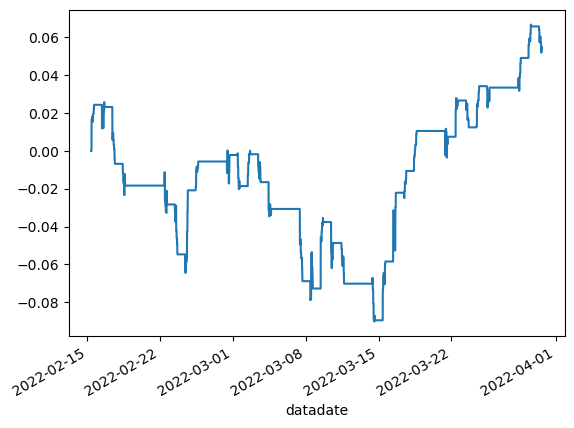

In [29]:
df_data_temp['cum_log_return'].plot()

<Axes: >

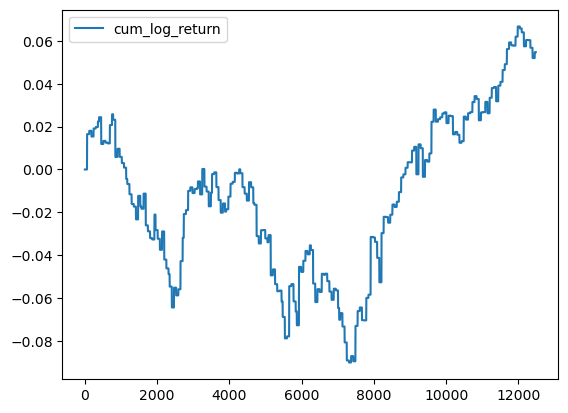

In [30]:
df_data_plot = df_data_temp['cum_log_return'].reset_index()#.plot()
del df_data_plot['datadate']
df_data_plot.plot()

In [31]:
def merge_dataframes2(df, df_data, column, datadate):
    df = df.dropna(subset=[column])
    df = df.sort_values(by=[column])
    df_data = df_data.dropna(subset=[datadate])
    df_data = df_data.sort_values(by=[datadate])
    df = df.merge(df_data, how='left', left_on=column, right_on=datadate)
    df = df.dropna(subset=[datadate])
    df = df.sort_values(by=[column])
    df = df.drop_duplicates(subset=[column], keep='first')
    df = df.sort_values(by=[datadate])
    df = df.drop_duplicates(subset=[datadate], keep='last')
    return df

In [32]:
df_temp = df.dropna(subset=['date']).sort_index()
del df_temp['date']
df_data_temp = df_data.dropna(subset=['datadate']).sort_index()
df_merge = df_temp.merge(df_data_temp, how='left', left_on='date', right_on='datadate')
df_merge


,a2c,ddpg,ppo,ensemble,datadate,nasdaq
0,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,2022-02-14 15:32:00,14257.78
1,9.999225e+05,9.997918e+05,1.000299e+06,9.997918e+05,2022-02-14 15:33:00,14257.78
2,1.000194e+06,1.000610e+06,1.000036e+06,1.000610e+06,2022-02-14 15:34:00,14257.78
3,1.000562e+06,1.001020e+06,1.000532e+06,1.001020e+06,2022-02-14 15:35:00,14257.78
4,9.995846e+05,1.000571e+06,9.987667e+05,1.000571e+06,2022-02-14 15:36:00,14257.78
...,...,...,...,...,...,...
12891,7.074902e+05,7.299219e+05,9.298576e+02,8.495172e+05,2022-03-30 15:27:00,15030.39
12892,7.077781e+05,7.301186e+05,9.301176e+02,8.496471e+05,2022-03-30 15:28:00,15030.39
12893,7.078407e+05,7.300449e+05,9.305027e+02,8.494970e+05,2022-03-30 15:29:00,15030.39
12894,7.080109e+05,7.301919e+05,9.271210e+02,8.495927e+05,2022-03-30 15:30:00,15071.55


In [33]:
def calculate_log_return(df, column):
    df[column+'_log_return'] = np.log(df[column]) - np.log(df[column].shift(1))
    df[column+'_cum_log_return'] = np.cumsum(df[column+'_log_return'])
    del df[column+'_log_return']
    return df

In [34]:
df_merge.columns

Index(['a2c', 'ddpg', 'ppo', 'ensemble', 'datadate', 'nasdaq'], dtype='object')

In [35]:
for column in ['a2c', 'ddpg', 'ppo', 'ensemble', 'nasdaq']:
    df_merge = calculate_log_return(df_merge, column)

In [36]:
df_merge

,a2c,ddpg,ppo,ensemble,datadate,nasdaq,a2c_cum_log_return,ddpg_cum_log_return,ppo_cum_log_return,ensemble_cum_log_return,nasdaq_cum_log_return
0,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,2022-02-14 15:32:00,14257.78,NaN,NaN,NaN,NaN,NaN
1,9.999225e+05,9.997918e+05,1.000299e+06,9.997918e+05,2022-02-14 15:33:00,14257.78,-0.000078,-0.000208,0.000299,-0.000208,0.000000
2,1.000194e+06,1.000610e+06,1.000036e+06,1.000610e+06,2022-02-14 15:34:00,14257.78,0.000194,0.000610,0.000036,0.000610,0.000000
3,1.000562e+06,1.001020e+06,1.000532e+06,1.001020e+06,2022-02-14 15:35:00,14257.78,0.000562,0.001019,0.000531,0.001019,0.000000
4,9.995846e+05,1.000571e+06,9.987667e+05,1.000571e+06,2022-02-14 15:36:00,14257.78,-0.000416,0.000571,-0.001234,0.000571,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
12891,7.074902e+05,7.299219e+05,9.298576e+02,8.495172e+05,2022-03-30 15:27:00,15030.39,-0.346032,-0.314818,-6.980479,-0.163087,0.052771
12892,7.077781e+05,7.301186e+05,9.301176e+02,8.496471e+05,2022-03-30 15:28:00,15030.39,-0.345625,-0.314548,-6.980200,-0.162934,0.052771
12893,7.078407e+05,7.300449e+05,9.305027e+02,8.494970e+05,2022-03-30 15:29:00,15030.39,-0.345536,-0.314649,-6.979786,-0.163111,0.052771
12894,7.080109e+05,7.301919e+05,9.271210e+02,8.495927e+05,2022-03-30 15:30:00,15071.55,-0.345296,-0.314448,-6.983426,-0.162998,0.055506


In [63]:
df_merge = df_merge.fillna(method='bfill')
df_merge.isnull().sum()

a2c                        0
ddpg                       0
ppo                        0
ensemble                   0
datadate                   0
nasdaq                     0
a2c_cum_log_return         0
ddpg_cum_log_return        0
ppo_cum_log_return         0
ensemble_cum_log_return    0
nasdaq_cum_log_return      0
dtype: int64

In [64]:
def filter_df(df):
    df = df.filter(regex='cum_log_return|datadate')
    df = df.set_index('datadate')
    return df

In [65]:
df_merge_final = filter_df(df_merge)
df_merge_final

,a2c_cum_log_return,ddpg_cum_log_return,ppo_cum_log_return,ensemble_cum_log_return,nasdaq_cum_log_return
datadate,,,,,
2022-02-14 15:32:00,-0.000078,-0.000208,0.000299,-0.000208,0.000000
2022-02-14 15:33:00,-0.000078,-0.000208,0.000299,-0.000208,0.000000
2022-02-14 15:34:00,0.000194,0.000610,0.000036,0.000610,0.000000
2022-02-14 15:35:00,0.000562,0.001019,0.000531,0.001019,0.000000
2022-02-14 15:36:00,-0.000416,0.000571,-0.001234,0.000571,0.000000
...,...,...,...,...,...
2022-03-30 15:27:00,-0.346032,-0.314818,-6.980479,-0.163087,0.052771
2022-03-30 15:28:00,-0.345625,-0.314548,-6.980200,-0.162934,0.052771
2022-03-30 15:29:00,-0.345536,-0.314649,-6.979786,-0.163111,0.052771


In [66]:
df_merge_final.nunique(axis=1).std()

0.04975363541285839

In [67]:
df_merge_final

,a2c_cum_log_return,ddpg_cum_log_return,ppo_cum_log_return,ensemble_cum_log_return,nasdaq_cum_log_return
datadate,,,,,
2022-02-14 15:32:00,-0.000078,-0.000208,0.000299,-0.000208,0.000000
2022-02-14 15:33:00,-0.000078,-0.000208,0.000299,-0.000208,0.000000
2022-02-14 15:34:00,0.000194,0.000610,0.000036,0.000610,0.000000
2022-02-14 15:35:00,0.000562,0.001019,0.000531,0.001019,0.000000
2022-02-14 15:36:00,-0.000416,0.000571,-0.001234,0.000571,0.000000
...,...,...,...,...,...
2022-03-30 15:27:00,-0.346032,-0.314818,-6.980479,-0.163087,0.052771
2022-03-30 15:28:00,-0.345625,-0.314548,-6.980200,-0.162934,0.052771
2022-03-30 15:29:00,-0.345536,-0.314649,-6.979786,-0.163111,0.052771


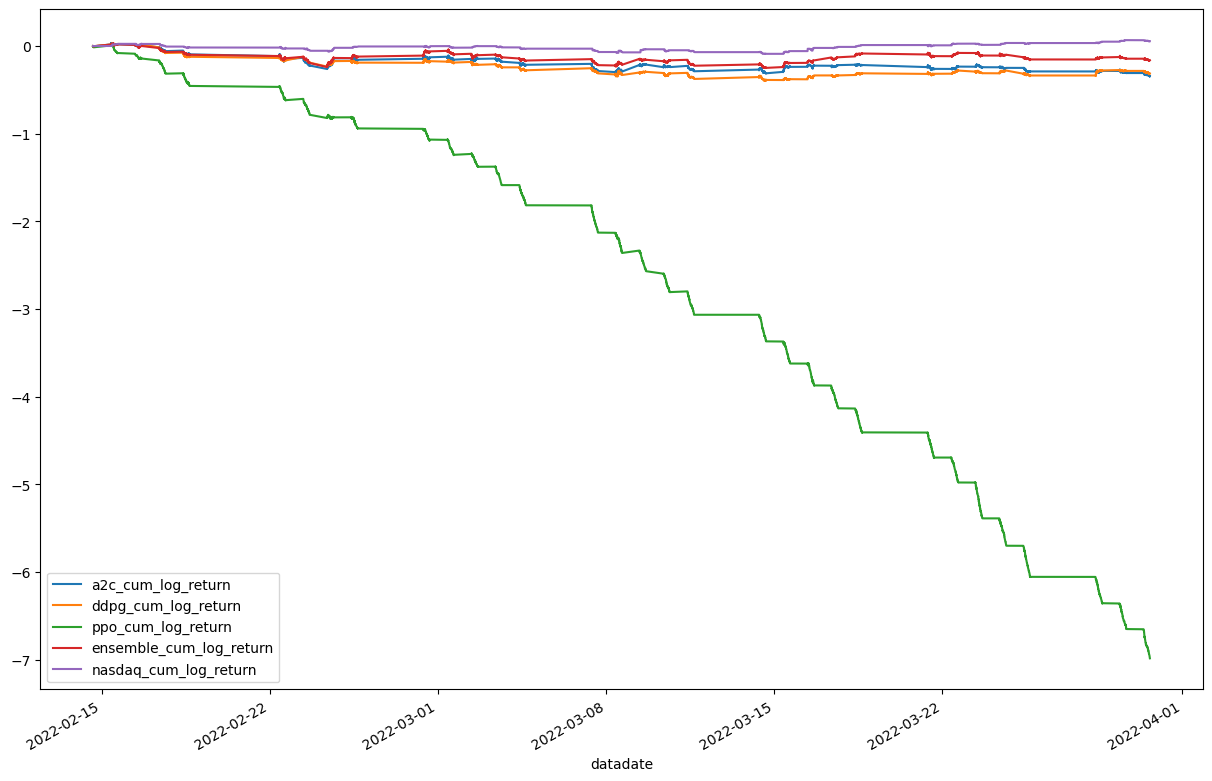

In [68]:
df_merge_final.plot(figsize=(15, 10))
plt.show()      

In [70]:
df_merge_final.columns

Index(['a2c_cum_log_return', 'ddpg_cum_log_return', 'ppo_cum_log_return',
       'ensemble_cum_log_return', 'nasdaq_cum_log_return'],
      dtype='object')

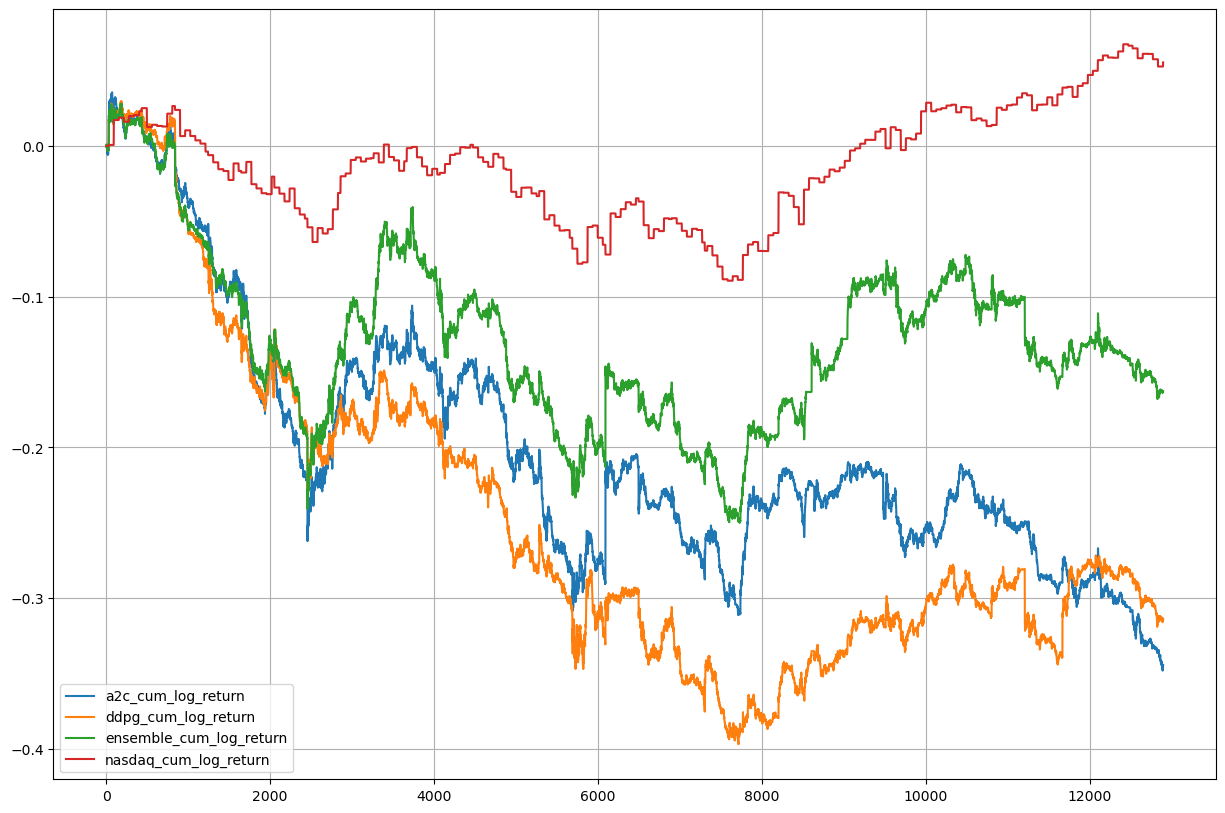

In [72]:
df_merge_final_temp = df_merge_final.sort_index()
df_merge_final_temp = df_merge_final_temp.reset_index()
del df_merge_final_temp['ppo_cum_log_return']
del df_merge_final_temp['datadate']
df_merge_final_temp.plot(figsize=(15, 10))#, ylim=(-1, None)
plt.grid()
plt.show()  

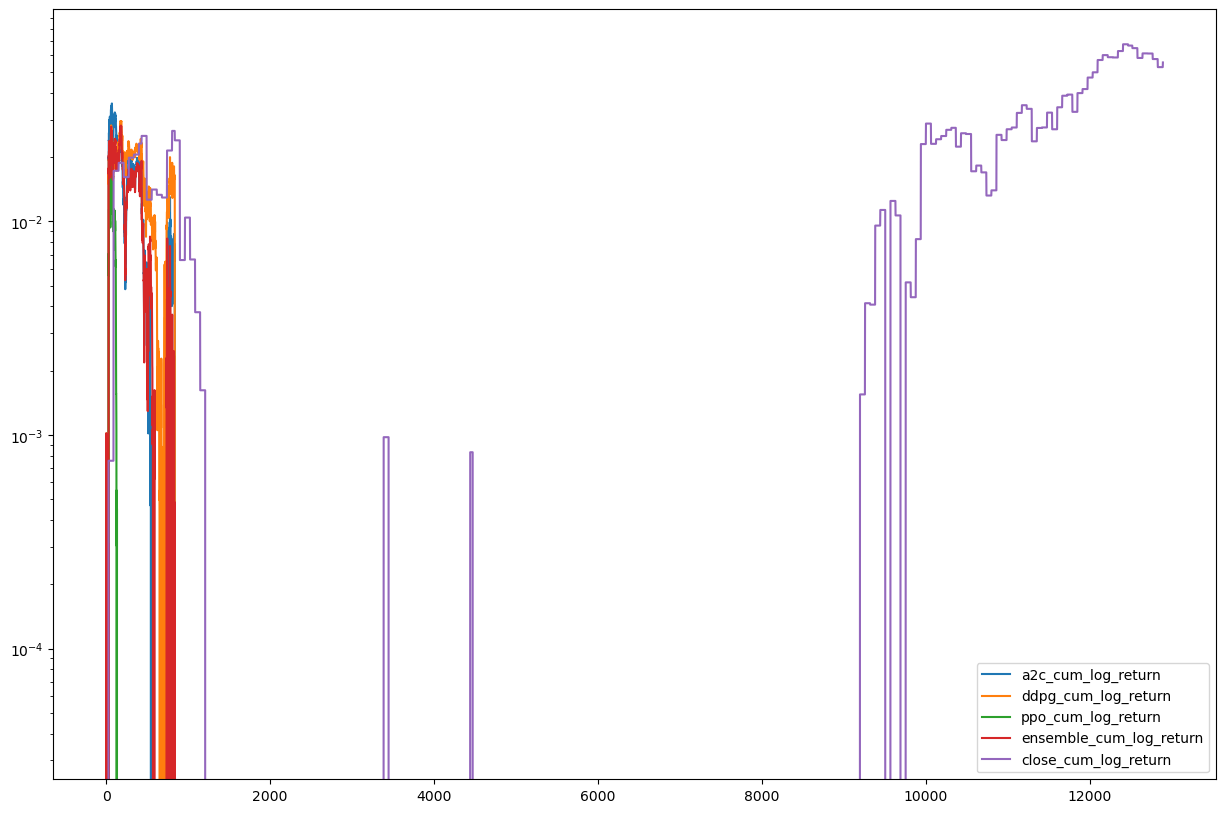

In [122]:
df_merge_final_temp.plot(figsize=(15, 10), logy=True)
plt.show()